Dataset: https://universe.roboflow.com/research-sakib/deepfruits-9nwps

In [1]:
# Library
import cv2
# from google.colab.patches import cv2_imshow
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
import os
import pandas as pd

# **Restorasi**

## TES gaussian noise restored

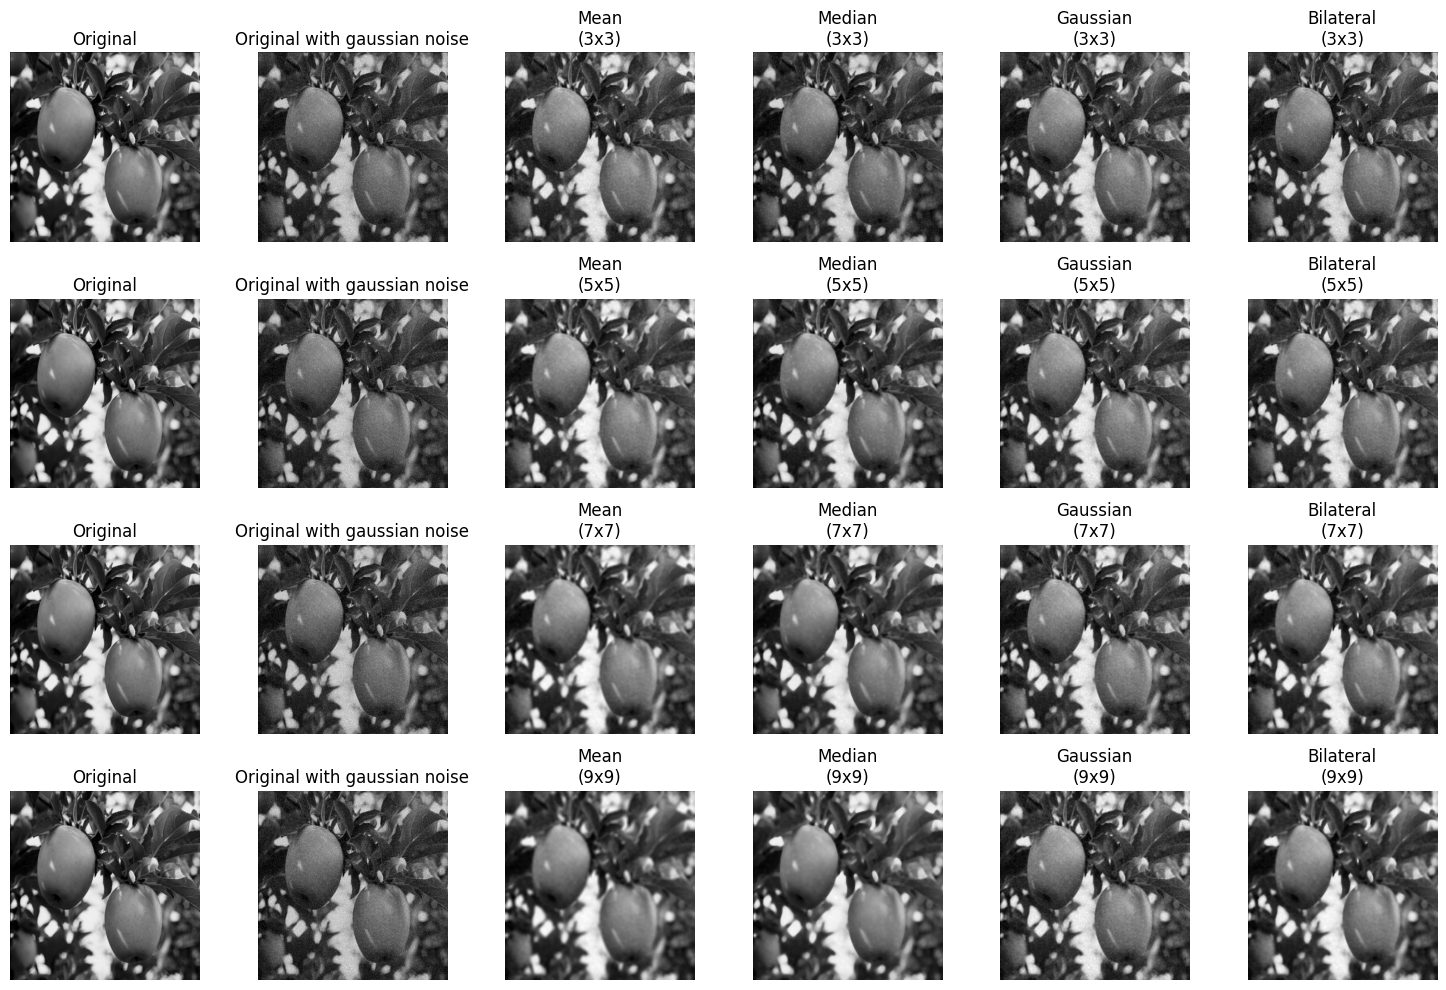

In [3]:
import cv2
import matplotlib.pyplot as plt

def mean_filter(image, filter_size=3):
    return cv2.blur(image, (filter_size, filter_size))

def median_filter(image, filter_size=3):
    return cv2.medianBlur(image, filter_size)

def gaussian_filter(image, filter_size=3, sigma=1):
    return cv2.GaussianBlur(image, (filter_size, filter_size), sigma)

def bilateral_filter(image, filter_size=9, sigma_color=75, sigma_space=75):
    return cv2.bilateralFilter(image, filter_size, sigma_color, sigma_space)

# Load gambar
image_ori = cv2.imread((r'C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\Image-Restoration-main\train\apples-photos--big-green-apples-on-tree--close-up-94309_png_jpg.rf.07c16239fd2555e8f56ebcd2fc74a188.jpg'), 0)
image_gauss = cv2.imread((r'C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\Image-Restoration-main\train_gaussian\apples-photos--big-green-apples-on-tree--close-up-94309_png_jpg.rf.07c16239fd2555e8f56ebcd2fc74a188.jpg'), 0)

# Ukuran filter yang akan dicoba
filter_sizes = [3, 5, 7, 9]

# Inisialisasi subplot
num_rows = len(filter_sizes)
num_cols = 6
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10), squeeze=False)

# Loop melalui semua jenis filter dan semua ukuran filter
for i, filter_size in enumerate(filter_sizes):
    # Menampilkan gambar asli di kolom pertama
    axes[i, 0].imshow(image_ori, cmap='gray')
    axes[i, 0].set_title('Original')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(image_gauss, cmap='gray')
    axes[i, 1].set_title('Original with gaussian noise')
    axes[i, 1].axis('off')

    # Loop melalui semua jenis filter
    for j, filter_type in enumerate([mean_filter, median_filter, gaussian_filter, bilateral_filter]):
        # Menerapkan filter
        filtered_image = filter_type(image_gauss, filter_size=filter_size)

        # Menampilkan gambar yang telah difilter
        axes[i, j+2].imshow(filtered_image, cmap='gray')
        filter_name = filter_type.__name__.replace('_filter', '').capitalize()
        axes[i, j+2].set_title(f'{filter_name}\n({filter_size}x{filter_size})')
        axes[i, j+2].axis('off')

plt.tight_layout()
plt.show()

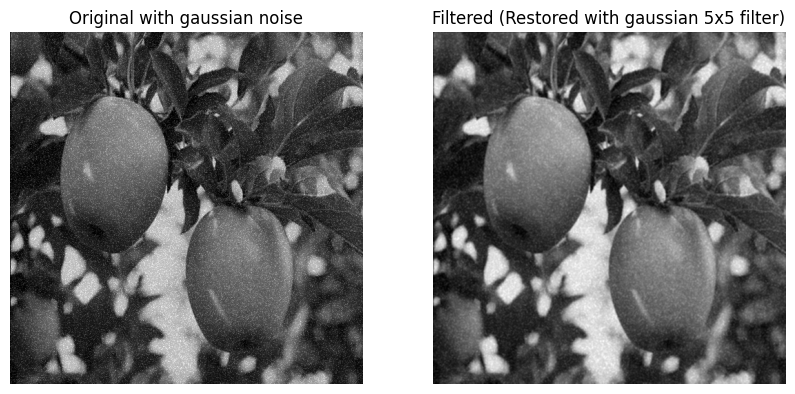

In [4]:
import cv2
import matplotlib.pyplot as plt

def gaussian_filter(image, filter_size=5, sigma=1):
    return cv2.GaussianBlur(image, (filter_size, filter_size), sigma)

# Load gambar
image_gauss = cv2.imread((r'C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\Image-Restoration-main\train_gaussian\apples-photos--big-green-apples-on-tree--close-up-94309_png_jpg.rf.07c16239fd2555e8f56ebcd2fc74a188.jpg'), 0)

# Terapkan median filter
filtered_image = gaussian_filter(image_gauss, filter_size=3)

# Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_gauss, cmap='gray')
plt.title('Original with gaussian noise')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered (Restored with gaussian 5x5 filter)')
plt.axis('off')

plt.show()

## gaussian noise restored

In [1]:
import cv2
import os
import pandas as pd

def gaussian_filter(image, filter_size=5, sigma=1):
    return cv2.GaussianBlur(image, (filter_size, filter_size), sigma)

def process_images_with_csv(input_dir, output_dir, filter_funcs, csv_file, csv_output):
    # Membaca file CSV yang berisi informasi kelas-kelas gambar dan nama file
    df = pd.read_csv(csv_file)

    # Membuat direktori output untuk menyimpan gambar yang telah difilter
    for filter_func in filter_funcs:
        filter_name = filter_func.__name__.replace('_', '')
        filter_output_dir = os.path.join(output_dir, filter_name)

        if not os.path.exists(filter_output_dir):
            os.makedirs(filter_output_dir)

    # Membuat DataFrame baru untuk menyimpan informasi hasil pengolahan gambar
    processed_df = pd.DataFrame(columns=['filename'] + list(df.columns[1:]))

    # Looping melalui file gambar dalam direktori input
    for filename in os.listdir(input_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                for filter_func in filter_funcs:
                    filtered_image = filter_func(image)
                    filter_name = filter_func.__name__.replace('_', '')
                    filter_output_path = os.path.join(output_dir, filter_name, filename)
                    if cv2.imwrite(filter_output_path, filtered_image):
                        print(f"Saved filtered image to {filter_output_path}")
                    else:
                        print(f"Failed to save filtered image to {filter_output_path}")

                    # Menyimpan informasi hasil pengolahan gambar ke DataFrame
                    class_label = None
                    for col in df.columns[1:]:
                        if not df.loc[df['filename'] == filename, col].empty:
                            if df.loc[df['filename'] == filename, col].iloc[0] == 1:
                                class_label = col
                                break

                    if class_label is not None:
                        # Menambahkan baris baru ke DataFrame
                        processed_df.loc[len(processed_df)] = [filename] + [0] * (len(df.columns) - 1)
                        # Menetapkan nilai kelas yang sesuai menjadi 1
                        processed_df.loc[processed_df['filename'] == filename, class_label] = 1

    print("Processed images with filters")

    # Simpan DataFrame hasil pengolahan gambar ke file CSV baru
    processed_csv_file = os.path.join(output_dir, csv_output)
    processed_df.to_csv(processed_csv_file, index=False)
    print(f"Processed CSV file saved as: {processed_csv_file}")

### train_gaussian restored

In [3]:
# Ganti 'path_to_input_dir' dan 'path_to_output_dir' dengan path yang sesuai
input_dir = r'C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\Image-Restoration-main\train_gaussian'
output_dir = r'C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\restored\train_gaussian_restored'
csv_file = r'C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\Image-Restoration-main\train_gaussian\_classes.csv'
csv_output = r'C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\restored\train_gaussian_restored\_classes.csv'

# Daftar fungsi filter yang tersedia
filter_funcs = [gaussian_filter]

process_images_with_csv(input_dir, output_dir, filter_funcs, csv_file, csv_output)

Saved filtered image to C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\restored\train_gaussian_restored\gaussianfilter\017_png_jpg.rf.5034925e62f0050f4eaa58e0d15aa8de.jpg
Saved filtered image to C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\restored\train_gaussian_restored\gaussianfilter\017_png_jpg.rf.5b2d1629019324de8b354488ed1945ad.jpg
Saved filtered image to C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\restored\train_gaussian_restored\gaussianfilter\017_png_jpg.rf.d103168de039d3cbf4b954fc2358a398.jpg
Saved filtered image to C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\restored\train_gaussian_restored\gaussianfilter\100_1935_png_jpg.rf.57dd4f995f7a2d8f4f18aa8b1d9ea78c.jpg
Saved filtered image to C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\restored\train_gaussian_restored\gaussianfilter\100_1935_png_jpg.rf.65e891ffbe139a706e3a0a14baddd373.jpg
Saved filtered image to C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\restored\train_gaussia

### test_gaussian restored

In [4]:
# Ganti 'path_to_input_dir' dan 'path_to_output_dir' dengan path yang sesuai
input_dir = r'C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\Image-Restoration-main\test_gaussian'
output_dir = r'C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\restored\test_gaussian_restored'
csv_file = r'C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\Image-Restoration-main\test_gaussian\_classes.csv'
csv_output = r'C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\restored\test_gaussian_restored\_classes.csv'

# Daftar fungsi filter yang tersedia
filter_funcs = [gaussian_filter]

process_images_with_csv(input_dir, output_dir, filter_funcs, csv_file, csv_output)

Saved filtered image to C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\restored\test_gaussian_restored\gaussianfilter\2009-09-15_23-09-46_utc-strawberries_png_jpg.rf.0a11ba60196a51c7693de365a753bffa.jpg
Saved filtered image to C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\restored\test_gaussian_restored\gaussianfilter\20151125T1143_pic000005_png_jpg.rf.df428e8a8223242dd6a61066ee2b74fe.jpg
Saved filtered image to C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\restored\test_gaussian_restored\gaussianfilter\20151125T1143_pic000033_png_jpg.rf.ef75367cfd45d3617b3738afdbfd85d0.jpg
Saved filtered image to C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\restored\test_gaussian_restored\gaussianfilter\20151125T1143_pic000068_png_jpg.rf.dc86a13d99a5817a196d371d6309942b.jpg
Saved filtered image to C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\restored\test_gaussian_restored\gaussianfilter\20151125T1143_pic000087_png_jpg.rf.1a4634355ee3333dddd33856dc347fa4.jpg
Sa

### valid_gaussian restored

In [5]:
# Ganti 'path_to_input_dir' dan 'path_to_output_dir' dengan path yang sesuai
input_dir = r'C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\Image-Restoration-main\valid_gaussian'
output_dir = r'C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\restored\valid_gaussian_restored'
csv_file = r'C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\Image-Restoration-main\valid_gaussian\_classes.csv'
csv_output = r'C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\restored\valid_gaussian_restored\_classes.csv'

# Daftar fungsi filter yang tersedia
filter_funcs = [gaussian_filter]

process_images_with_csv(input_dir, output_dir, filter_funcs, csv_file, csv_output)

Saved filtered image to C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\restored\valid_gaussian_restored\gaussianfilter\1460105322_1756a2ed7f_png_jpg.rf.8044d40186072b7210b98d0b0bb460db.jpg
Saved filtered image to C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\restored\valid_gaussian_restored\gaussianfilter\20151125T1138_pic000066_png_jpg.rf.7edfc72a36b76f18427512051d3bdff6.jpg
Saved filtered image to C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\restored\valid_gaussian_restored\gaussianfilter\20151125T1138_pic000139_png_jpg.rf.fdbc49056a2cc3886fe1a13b1b165371.jpg
Saved filtered image to C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\restored\valid_gaussian_restored\gaussianfilter\20151125T1138_pic000204_png_jpg.rf.968f8e4dda2f6909b499c3165597a711.jpg
Saved filtered image to C:\MyFolder\.Aipibi\.SEMS 6\PCD\praktikum\projek\baru\restored\valid_gaussian_restored\gaussianfilter\20151125T1138_pic000290_png_jpg.rf.20ce9059356a64efc4631df24231c54e.jpg
Saved filter